In [58]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

** Problem Statement:
Based on given data of visitors browsing for online shopping, build different clusters to know whether person is only browsing and visiting multiples pages or also generating revenue for the shoppers as well.  Analyse and compare the clusters formed with the existing Revenue Column **


In [60]:
df=pd.read_csv('online_shoppers_intention.csv')

In [61]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [62]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [63]:
df.shape

(12330, 18)

In [64]:
df.select_dtypes(include = np.number).columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType'],
      dtype='object')

In [65]:
num=df.select_dtypes(include = 'object').columns

In [66]:
df['VisitorType'].unique()

array(['Returning_Visitor', 'New_Visitor', 'Other'], dtype=object)

<AxesSubplot:>

<Figure size 1440x2880 with 0 Axes>

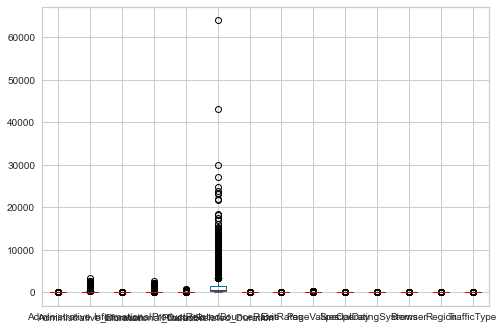

In [67]:
plt.figure(figsize=(20,40))
df.plot(kind = 'box')


In [68]:
#outlier treatmetnt
for i in df.select_dtypes(include=np.number).columns:
    q3 = np.quantile(df[i],0.75)
    q1 = np.quantile(df[i],0.25)
    
    IQR = q3 - q1
    
    IQR
    
    UL = q3 +(1.5*IQR)
    LL = q1 -(1.5*IQR)
    
    df.loc[df[i]>UL,i] = UL
    df.loc[df[i]<LL,i] = LL

In [69]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Administrative,12330.0,2.198783,2.924632,0.0,0.000000,1.000000,4.000000,10.000000
Administrative_Duration,12330.0,56.972776,79.250727,0.0,0.000000,7.500000,93.256250,233.140625
Informational,12330.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
Informational_Duration,12330.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
ProductRelated,12330.0,26.696229,25.155967,0.0,7.000000,18.000000,38.000000,84.500000
ProductRelated_Duration,12330.0,989.691454,1033.120180,0.0,184.137500,598.936905,1464.157214,3384.186784
BounceRates,12330.0,0.010929,0.014875,0.0,0.000000,0.003112,0.016813,0.042031
ExitRates,12330.0,0.036452,0.030513,0.0,0.014286,0.025156,0.050000,0.103571
PageValues,12330.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
SpecialDay,12330.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000


In [70]:
#vislualize
df.select_dtypes(include='object')
df['VisitorType'].unique()

df['VisiorType'] = df.VisitorType.map({'Returning_Visitor':0,'New_Visitor':1,'Other':2})

In [71]:
from sklearn.preprocessing import LabelEncoder

In [72]:
le = LabelEncoder()

In [73]:
df['Weekend']=le.fit_transform(df['Weekend'])

In [74]:
df['Revenue'] =le.fit_transform(df['Revenue'])

In [75]:
df.select_dtypes(include='object').columns

Index(['Month', 'VisitorType'], dtype='object')

In [76]:
df.drop('Month',axis =1,inplace=True)

In [77]:
df.drop('VisitorType',axis =1)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue,VisiorType
0,0,0.0,0,0.0,1.0,0.000000,0.042031,0.103571,0.0,0.0,1.0,2,1.0,1,0,0,0
1,0,0.0,0,0.0,2.0,64.000000,0.000000,0.100000,0.0,0.0,2.0,2,1.0,2,0,0,0
2,0,0.0,0,0.0,1.0,0.000000,0.042031,0.103571,0.0,0.0,4.0,2,8.5,3,0,0,0
3,0,0.0,0,0.0,2.0,2.666667,0.042031,0.103571,0.0,0.0,3.0,2,2.0,4,0,0,0
4,0,0.0,0,0.0,10.0,627.500000,0.020000,0.050000,0.0,0.0,3.0,2,1.0,4,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53.0,1783.791667,0.007143,0.029031,0.0,0.0,4.0,2,1.0,1,1,0,0
12326,0,0.0,0,0.0,5.0,465.750000,0.000000,0.021333,0.0,0.0,3.0,2,1.0,7,1,0,0
12327,0,0.0,0,0.0,6.0,184.250000,0.042031,0.086667,0.0,0.0,3.0,2,1.0,7,1,0,0
12328,4,75.0,0,0.0,15.0,346.000000,0.000000,0.021053,0.0,0.0,2.0,2,3.0,7,0,0,0


In [78]:
from sklearn.preprocessing import StandardScaler

In [79]:
df_s = pd.DataFrame(data = df,columns=df.columns)


In [80]:
df_s=df_s.drop('VisitorType',axis=1)

In [81]:
df_s

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue,VisiorType
0,0,0.0,0,0.0,1.0,0.000000,0.042031,0.103571,0.0,0.0,1.0,2,1.0,1,0,0,0
1,0,0.0,0,0.0,2.0,64.000000,0.000000,0.100000,0.0,0.0,2.0,2,1.0,2,0,0,0
2,0,0.0,0,0.0,1.0,0.000000,0.042031,0.103571,0.0,0.0,4.0,2,8.5,3,0,0,0
3,0,0.0,0,0.0,2.0,2.666667,0.042031,0.103571,0.0,0.0,3.0,2,2.0,4,0,0,0
4,0,0.0,0,0.0,10.0,627.500000,0.020000,0.050000,0.0,0.0,3.0,2,1.0,4,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53.0,1783.791667,0.007143,0.029031,0.0,0.0,4.0,2,1.0,1,1,0,0
12326,0,0.0,0,0.0,5.0,465.750000,0.000000,0.021333,0.0,0.0,3.0,2,1.0,7,1,0,0
12327,0,0.0,0,0.0,6.0,184.250000,0.042031,0.086667,0.0,0.0,3.0,2,1.0,7,1,0,0
12328,4,75.0,0,0.0,15.0,346.000000,0.000000,0.021053,0.0,0.0,2.0,2,3.0,7,0,0,0


In [82]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [83]:
wcss = []
sil_score = []
for k in range(2,10):
    model = KMeans(n_clusters=k)
    pred = model.fit_predict(df_s)
    wcss.append(model.inertia_)

In [84]:
wcss

[3139682517.7356033,
 1284165409.3683925,
 707550467.8225596,
 453730503.23303425,
 331977918.3651813,
 253908874.58847868,
 206665310.58940554,
 175594979.85574567]

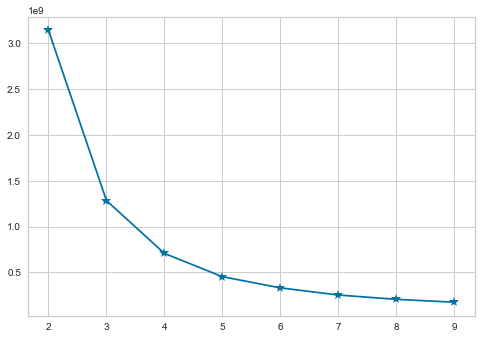

In [85]:
plt.plot(range(2,10),wcss,marker = '*',ms = 10)

In [86]:
from yellowbrick import ClassificationScoreVisualizer

In [ ]:
ClassificationScoreVisualizerficationScoreVisualizerassificationScoreVisualizer

In [87]:
model = KMeans()

In [88]:
from yellowbrick.cluster import KElbowVisualizer,SilhouetteVisualizer

In [89]:
viz= KElbowVisualizer(estimator = model,k=10)

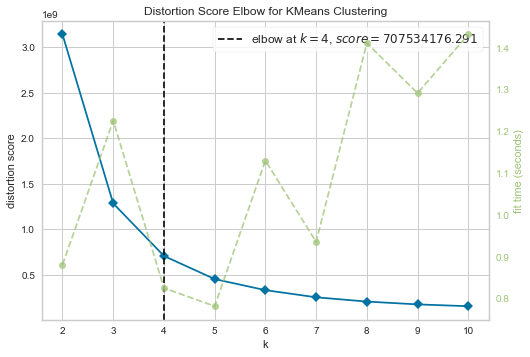

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [90]:
viz.fit(df_s)
viz.show()

In [91]:
model = KMeans(n_clusters=4,random_state=3)

In [92]:
df_s['model_km'] = model.fit_predict(df_s)

In [93]:
df_s

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue,VisiorType,model_km
0,0,0.0,0,0.0,1.0,0.000000,0.042031,0.103571,0.0,0.0,1.0,2,1.0,1,0,0,0,0
1,0,0.0,0,0.0,2.0,64.000000,0.000000,0.100000,0.0,0.0,2.0,2,1.0,2,0,0,0,0
2,0,0.0,0,0.0,1.0,0.000000,0.042031,0.103571,0.0,0.0,4.0,2,8.5,3,0,0,0,0
3,0,0.0,0,0.0,2.0,2.666667,0.042031,0.103571,0.0,0.0,3.0,2,2.0,4,0,0,0,0
4,0,0.0,0,0.0,10.0,627.500000,0.020000,0.050000,0.0,0.0,3.0,2,1.0,4,1,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53.0,1783.791667,0.007143,0.029031,0.0,0.0,4.0,2,1.0,1,1,0,0,3
12326,0,0.0,0,0.0,5.0,465.750000,0.000000,0.021333,0.0,0.0,3.0,2,1.0,7,1,0,0,0
12327,0,0.0,0,0.0,6.0,184.250000,0.042031,0.086667,0.0,0.0,3.0,2,1.0,7,1,0,0,0
12328,4,75.0,0,0.0,15.0,346.000000,0.000000,0.021053,0.0,0.0,2.0,2,3.0,7,0,0,0,0


In [94]:
df_s['model_km'].value_counts()

0    5960
2    3147
3    1709
1    1514
Name: model_km, dtype: int64

In [95]:
df_s.loc[df_s['model_km']== 1]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue,VisiorType,model_km
19,0,0.000000,0,0.0,20.0,2981.166667,0.000000,0.010000,0.0,0.0,2.0,2,4.0,4,0,0,0,1
40,1,9.000000,0,0.0,46.0,3384.186784,0.000000,0.001795,0.0,0.0,2.0,2,8.0,4,0,0,0,1
66,4,44.000000,0,0.0,84.5,3384.186784,0.002151,0.015013,0.0,0.0,4.0,2,1.0,3,0,0,0,1
100,3,18.333333,0,0.0,38.0,2635.177778,0.000000,0.008947,0.0,0.0,2.0,2,1.0,2,0,0,0,1
109,6,233.140625,0,0.0,84.5,3384.186784,0.000855,0.017918,0.0,0.0,2.0,2,1.0,3,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12287,8,167.910714,0,0.0,84.5,3384.186784,0.003361,0.009432,0.0,0.0,3.0,2,6.0,2,0,0,0,1
12308,1,19.000000,0,0.0,45.0,3384.186784,0.009091,0.021970,0.0,0.0,2.0,2,3.0,1,1,0,0,1
12311,1,0.000000,0,0.0,84.5,3384.186784,0.001361,0.020664,0.0,0.0,2.0,2,1.0,2,0,1,0,1
12312,7,150.357143,0,0.0,84.5,3384.186784,0.011149,0.021904,0.0,0.0,2.0,2,1.0,2,1,1,0,1


In [96]:
clust = model.cluster_centers_

In [97]:
clust

array([[1.19936284e+00, 3.12858936e+01, 0.00000000e+00, 0.00000000e+00,
        9.38229376e+00, 2.05658850e+02, 1.43093268e-02, 4.99096896e-02,
        0.00000000e+00, 0.00000000e+00, 2.08568075e+00, 2.00000000e+00,
        3.14579142e+00, 3.33182428e+00, 2.20657277e-01, 8.43393696e-02,
        1.97015426e-01],
       [4.50826173e+00, 1.08779360e+02, 0.00000000e+00, 0.00000000e+00,
        7.13238599e+01, 3.21378891e+03, 6.63308139e-03, 2.08587504e-02,
        0.00000000e+00, 0.00000000e+00, 2.13945803e+00, 2.00000000e+00,
        2.95968275e+00, 2.97091870e+00, 2.36615995e-01, 2.72967614e-01,
        3.63516193e-02],
       [2.38353988e+00, 6.42680583e+01, 0.00000000e+00, 0.00000000e+00,
        2.80147760e+01, 9.22675707e+02, 8.11904945e-03, 2.51987004e-02,
        0.00000000e+00, 0.00000000e+00, 2.09294566e+00, 2.00000000e+00,
        3.12122656e+00, 3.18589133e+00, 2.52621544e-01, 2.03368287e-01,
        1.57292660e-01],
       [3.30363423e+00, 8.73684101e+01, 0.00000000e+00, 0.000

In [98]:
df['model_km'] = df_s['model_km']

In [99]:
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,VisiorType,model_km
0,0,0.0,0,0.0,1.0,0.000000,0.042031,0.103571,0.0,0.0,1.0,2,1.0,1,Returning_Visitor,0,0,0,0
1,0,0.0,0,0.0,2.0,64.000000,0.000000,0.100000,0.0,0.0,2.0,2,1.0,2,Returning_Visitor,0,0,0,0
2,0,0.0,0,0.0,1.0,0.000000,0.042031,0.103571,0.0,0.0,4.0,2,8.5,3,Returning_Visitor,0,0,0,0
3,0,0.0,0,0.0,2.0,2.666667,0.042031,0.103571,0.0,0.0,3.0,2,2.0,4,Returning_Visitor,0,0,0,0
4,0,0.0,0,0.0,10.0,627.500000,0.020000,0.050000,0.0,0.0,3.0,2,1.0,4,Returning_Visitor,1,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53.0,1783.791667,0.007143,0.029031,0.0,0.0,4.0,2,1.0,1,Returning_Visitor,1,0,0,3
12326,0,0.0,0,0.0,5.0,465.750000,0.000000,0.021333,0.0,0.0,3.0,2,1.0,7,Returning_Visitor,1,0,0,0
12327,0,0.0,0,0.0,6.0,184.250000,0.042031,0.086667,0.0,0.0,3.0,2,1.0,7,Returning_Visitor,1,0,0,0
12328,4,75.0,0,0.0,15.0,346.000000,0.000000,0.021053,0.0,0.0,2.0,2,3.0,7,Returning_Visitor,0,0,0,0


In [41]:
 df_s

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue,VisiorType,model_km
0,0,0.0,0,0.0,1.0,0.000000,0.042031,0.103571,0.0,0.0,1.0,2,1.0,1,0,0,0,0
1,0,0.0,0,0.0,2.0,64.000000,0.000000,0.100000,0.0,0.0,2.0,2,1.0,2,0,0,0,0
2,0,0.0,0,0.0,1.0,0.000000,0.042031,0.103571,0.0,0.0,4.0,2,8.5,3,0,0,0,0
3,0,0.0,0,0.0,2.0,2.666667,0.042031,0.103571,0.0,0.0,3.0,2,2.0,4,0,0,0,0
4,0,0.0,0,0.0,10.0,627.500000,0.020000,0.050000,0.0,0.0,3.0,2,1.0,4,1,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53.0,1783.791667,0.007143,0.029031,0.0,0.0,4.0,2,1.0,1,1,0,0,3
12326,0,0.0,0,0.0,5.0,465.750000,0.000000,0.021333,0.0,0.0,3.0,2,1.0,7,1,0,0,0
12327,0,0.0,0,0.0,6.0,184.250000,0.042031,0.086667,0.0,0.0,3.0,2,1.0,7,1,0,0,0
12328,4,75.0,0,0.0,15.0,346.000000,0.000000,0.021053,0.0,0.0,2.0,2,3.0,7,0,0,0,0


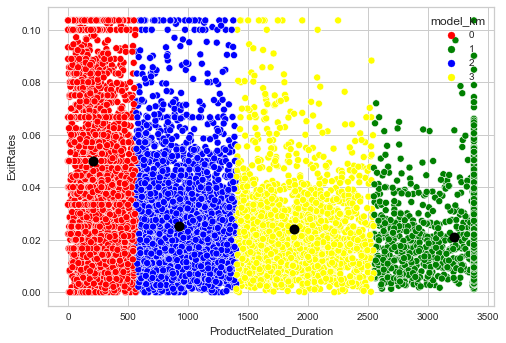

In [103]:
sns.scatterplot(x = 'ProductRelated_Duration',y = 'ExitRates',hue='model_km',data=df,
                palette=['red','green','blue','yellow'])
plt.plot(clust[0][5],clust[0][7],marker = 'o',ms = 10,color = 'black')
plt.plot(clust[1][5],clust[1][7],marker = 'o',ms = 10,color = 'black')
plt.plot(clust[2][5],clust[2][7],marker = 'o',ms = 10,color = 'black')
plt.plot(clust[3][5],clust[3][7],marker = 'o',ms = 10,color = 'black')
plt.show()

# Aggloromative clustring

In [104]:
from sklearn.cluster import AgglomerativeClustering

In [105]:
from scipy.cluster.hierarchy import dendrogram,linkage

In [106]:
dist_point = linkage(df_s,method='ward')

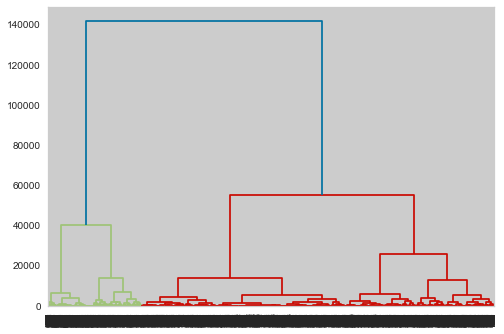

In [107]:
dend = dendrogram(dist_point) 

In [108]:
model=AgglomerativeClustering(n_clusters=2)

In [109]:
df_s['Agglo_km'] = model.fit_predict(df_s)

In [110]:
df_s['Agglo_km'].value_countscounts()

0    9752
1    2578
Name: Agglo_km, dtype: int64

<AxesSubplot:xlabel='ProductRelated_Duration', ylabel='ExitRates'>

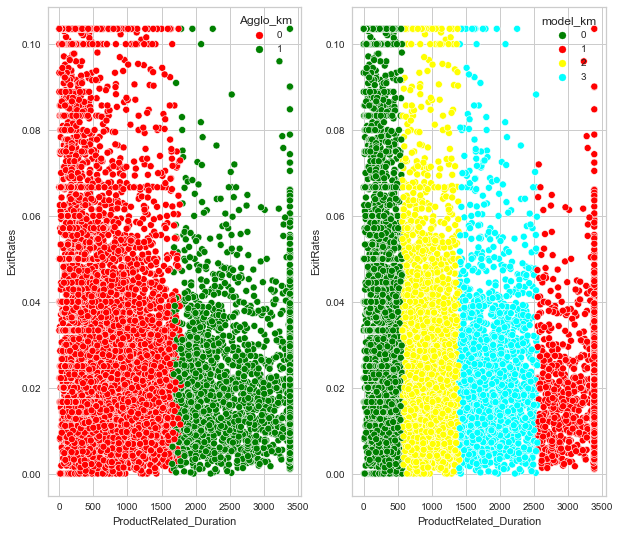

In [120]:
plt.figure(figsize=(10,9))
plt.subplot(1,2,1)
sns.scatterplot(x = 'ProductRelated_Duration',y= 'ExitRates',hue=df_s['Agglo_km'],data=df_s,
                palette=['red','green'])
plt.subplot(1,2,2)
sns.scatterplot(x = 'ProductRelated_Duration',y='ExitRates',hue=df_s['model_km'],data=df_s,
               palette=['green','red','yellow','cyan'])

In [121]:
from sklearn.cluster import DBSCAN

In [129]:
from sklearn.neighbors import NearestNeighbors 

In [132]:
nn = NearestNeighbors(n_neighbors=2)

In [133]:
model = nn.fit(df_s)

In [141]:
distance,index = model.kneighbors(df_s)

In [142]:
distance

array([[5.96046448e-08, 5.96046448e-08],
       [0.00000000e+00, 1.11803399e+00],
       [0.00000000e+00, 1.00000000e+00],
       ...,
       [0.00000000e+00, 2.30229530e+00],
       [0.00000000e+00, 6.43896612e+00],
       [0.00000000e+00, 1.75031743e+00]])

In [143]:
distance = np.sort(distance,axis=0)

In [144]:
distance

array([[0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00],
       ...,
       [2.15791864e-05, 4.57757350e+01],
       [3.05175781e-05, 5.10913296e+01],
       [6.10351562e-05, 5.76782511e+01]])

In [145]:
index

array([[ 1285,     0],
       [    1, 11372],
       [    2,  4224],
       ...,
       [12327,  5896],
       [12328,  7101],
       [12329,  2635]], dtype=int32)

Text(0.5, 1.0, 'KDE plot')

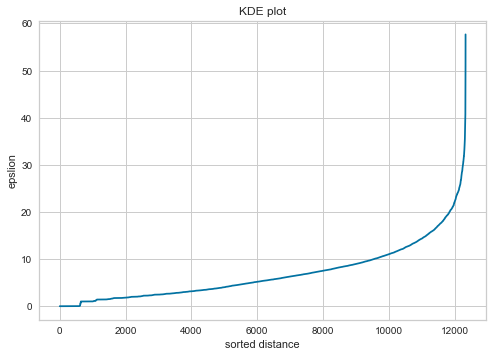

In [147]:
plt.plot(distance[:,1])
plt.xlabel('sorted distance')
plt.ylabel('epslion')
plt.title('KDE plot')

In [148]:
model = DBSCAN(eps=1,min_samples=20)

In [149]:
df_s['db_km'] = model.fit_predict(df_s)

In [151]:
df_s['db_km'].value_counts()

-1    12226
 0       40
 2       40
 1       24
Name: db_km, dtype: int64

In [150]:
df_s

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue,VisiorType,model_km,Agglo_km,db_km
0,0,0.0,0,0.0,1.0,0.000000,0.042031,0.103571,0.0,0.0,1.0,2,1.0,1,0,0,0,0,0,-1
1,0,0.0,0,0.0,2.0,64.000000,0.000000,0.100000,0.0,0.0,2.0,2,1.0,2,0,0,0,0,0,-1
2,0,0.0,0,0.0,1.0,0.000000,0.042031,0.103571,0.0,0.0,4.0,2,8.5,3,0,0,0,0,0,-1
3,0,0.0,0,0.0,2.0,2.666667,0.042031,0.103571,0.0,0.0,3.0,2,2.0,4,0,0,0,0,0,-1
4,0,0.0,0,0.0,10.0,627.500000,0.020000,0.050000,0.0,0.0,3.0,2,1.0,4,1,0,0,2,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53.0,1783.791667,0.007143,0.029031,0.0,0.0,4.0,2,1.0,1,1,0,0,3,1,-1
12326,0,0.0,0,0.0,5.0,465.750000,0.000000,0.021333,0.0,0.0,3.0,2,1.0,7,1,0,0,0,0,-1
12327,0,0.0,0,0.0,6.0,184.250000,0.042031,0.086667,0.0,0.0,3.0,2,1.0,7,1,0,0,0,0,-1
12328,4,75.0,0,0.0,15.0,346.000000,0.000000,0.021053,0.0,0.0,2.0,2,3.0,7,0,0,0,0,0,-1


In [152]:
from sklearn.metrics import silhouette_score

In [157]:
sil_score =[]
for i in range(20,25):
    model = DBSCAN(eps=1,min_samples=i)
    pred = model.fit_predict(df_s)
    #sil_score.append(silhouette_score(df_s,pred))

# PCA (principle componant Analysis)

In [158]:
from sklearn.decomposition import PCA

In [159]:
pca = PCA(n_components=20)

In [160]:
data_pca = pca.fit_transform(df_s)

In [161]:
data_pca=pd.DataFrame(data_pca)

In [162]:
var = pca.explained_variance_ratio_

In [163]:
var

array([9.94729342e-01, 5.10068403e-03, 1.56484032e-04, 5.14752827e-06,
       4.02745740e-06, 2.40146171e-06, 8.66944241e-07, 5.67447920e-07,
       1.66887621e-07, 1.36044694e-07, 1.04786762e-07, 3.71441876e-08,
       3.32388267e-08, 6.38034269e-10, 7.07655800e-11, 2.48108588e-38,
       7.91928942e-39, 3.23281942e-39, 3.62469643e-40, 9.52131904e-44])

In [171]:
add = 0
for i in range(20):
    add = add+var[i]
    print('total varience PC%s is %.2f'%(i+1,add))

total varience PC1 is 0.99
total varience PC2 is 1.00
total varience PC3 is 1.00
total varience PC4 is 1.00
total varience PC5 is 1.00
total varience PC6 is 1.00
total varience PC7 is 1.00
total varience PC8 is 1.00
total varience PC9 is 1.00
total varience PC10 is 1.00
total varience PC11 is 1.00
total varience PC12 is 1.00
total varience PC13 is 1.00
total varience PC14 is 1.00
total varience PC15 is 1.00
total varience PC16 is 1.00
total varience PC17 is 1.00
total varience PC18 is 1.00
total varience PC19 is 1.00
total varience PC20 is 1.00


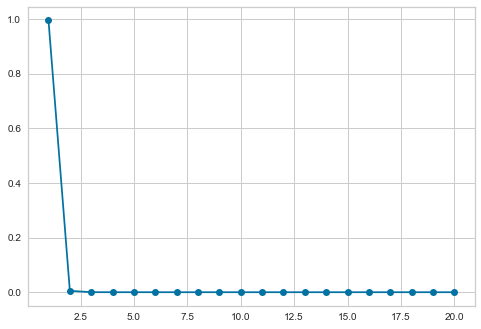

In [174]:
plt.plot(range(1,21),var,marker = 'o')